In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
uploaded = files.upload()

Saving dw_sales.csv to dw_sales.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dw_sales.csv']))
df.drop(['time_id-2'], axis=1, inplace=True)
df.drop(['time_id'], axis=1, inplace=True)
df.head()

,customer_id,product_id,store_id,quantity,total,day_of_month,day_of_week,month,year,quarter,day_of_year
0,954,1,1,3,5.97,16,4,6,2021,2,167
1,116,1,1,4,7.96,16,4,6,2021,2,167
2,1518,1,1,1,1.99,16,4,6,2021,2,167
3,1519,1,1,1,1.99,16,4,6,2021,2,167
4,1539,1,2,1,1.99,18,6,6,2021,2,169


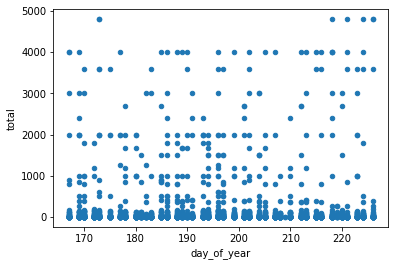

In [ ]:
# Scatter Plot: Not very ninear
df.plot(kind='scatter',x='day_of_year',y='total')
plt.show()

In [ ]:
# Ingresos acumulados por dia. Comienza a contar desde el primer dia registrado
data = df[['day_of_year','total']].groupby(by='day_of_year', as_index=False).agg('sum')
for i in range(1, len(data)):
  data.loc[i,'total'] = data.loc[i,'total']  + data.loc[i-1,'total'] 

In [ ]:
data.head()

,day_of_year,total
0,167,15915.24
1,169,35946.53
2,170,49908.95
3,172,55489.82
4,173,81612.56


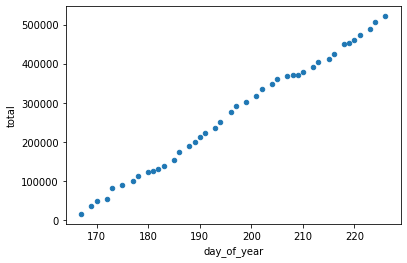

In [ ]:
# Scatter Plot: Linear AF
data.plot(kind='scatter',x='day_of_year',y='total')
plt.show()

In [ ]:
# Reshape
x = data.day_of_year.values.reshape(-1,1)
y = data.total.values

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1)

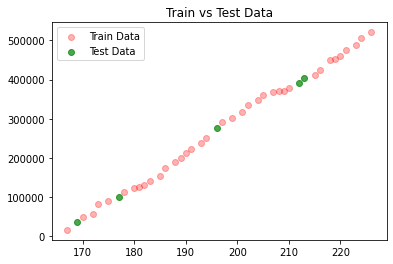

In [ ]:
# Plot train vs test
plt.scatter(x_train, y_train, label='Train Data', color='r', alpha=.3)
plt.scatter(x_test, y_test, label='Test Data', color='g', alpha=.7)
plt.legend()
plt.title('Train vs Test Data')
plt.show()

In [ ]:
# Regresion Lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Calcular Predicciones
pred = model.predict(x_test)

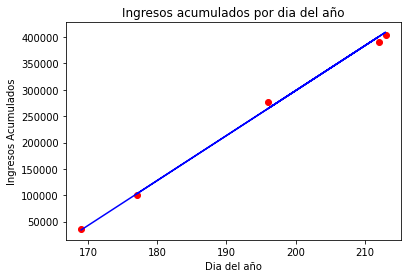

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, pred, color = 'blue')
plt.title('Ingresos acumulados por dia del año')
plt.xlabel('Dia del año')
plt.ylabel('Ingresos Acumulados')
plt.show()

In [ ]:
# R-cuadrado
from sklearn.metrics import r2_score
print('R^2:',r2_score(y_test, pred))

R^2: 0.9973076729516072


In [ ]:
valor = 300 # valor a predecir
pred_1 = model.predict([[valor]])
prior = model.predict([[valor-1]])
result = pred_1[0]-prior[0]

In [ ]:
print('Para el dia del año {}\ningresos acumulados: {} \ningresos del dia: {}'.format(valor,pred_1[0],result))

Para el dia del año 300
ingresos acumulados: 1150353.2941063917 
ingresos del dia: 8519.376160025131
